In [157]:
# cd scoringstudio
!ls

case.xlsx  solution.ipynb  описание.txt


In [158]:
import pandas as pd
import numpy as np
train = pd.read_excel('case.xlsx')

In [159]:
train.fillna('NaN', inplace=True)
print(train['Сумма долга*'].mean(), train['Сумма долга*'].median())

for column in train.columns:
    if train[column].nunique() < 60:
        print(column, sorted(train[column].unique()))
    else:
        print(column, train[column].nunique())

542.218964245 0.0
Год [2015, 2016]
Месяц [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Сумма кредита 8627
Тип клиента ['Тип клиента I', 'Тип клиента II']
Вероятность дефолта ['A', 'B', 'C', 'D', 'E']
Заработная плата 196
Возраст (полных лет) на момент подачи заявки [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
Семейное положение ['NaN', 'Вдовец/Вдова', 'Женат/Замужем', 'Разведен(а)', 'Холост/Не замужем']
Образование ['2 и более высших', 'NaN', 'Высшее', 'Начальное или неполное среднее', 'Неполное высшее', 'Среднее, в том числе специальное', 'Ученая степень']
Пол ['Ж', 'М']
Количество детей ['1 ребенок', '2 ребенка', '3 ребенка', 'NaN', 'Нет', 'более 3-х']
Срок кредита (месяцев) [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Сумма товаров 5115
Сумма долга* 460


In [160]:
# row_index = train.Год == 2015
# train.loc[row_index] = 2015
all_data = train
all_data['Сумма кредита'] = all_data['Сумма кредита'].astype('int64')
all_data['Заработная плата'].replace('NaN', -1, inplace=True)
all_data['Заработная плата'] = all_data['Заработная плата'].astype('int64')
all_data['Сумма товаров'] = all_data['Сумма товаров'].astype('int64')
all_data['Сумма долга*'] = all_data['Сумма долга*'].astype('int64')
all_data.dtypes

Год                                              int64
Месяц                                            int64
Сумма кредита                                    int64
Тип клиента                                     object
Вероятность дефолта                             object
Заработная плата                                 int64
Возраст (полных лет) на момент подачи заявки     int64
Семейное положение                              object
Образование                                     object
Пол                                             object
Количество детей                                object
Срок кредита (месяцев)                           int64
Сумма товаров                                    int64
Сумма долга*                                     int64
dtype: object

In [161]:
from sklearn.preprocessing import LabelEncoder

for column in all_data :
    encoder = LabelEncoder()
    if all_data[column].dtype == 'object':
        all_data[column] = encoder.fit_transform(all_data[column])
all_data.head(3)

,Год,Месяц,Сумма кредита,Тип клиента,Вероятность дефолта,Заработная плата,Возраст (полных лет) на момент подачи заявки,Семейное положение,Образование,Пол,Количество детей,Срок кредита (месяцев),Сумма товаров,Сумма долга*
0,2015,1,22249,0,0,40000,30,2,2,1,1,6,25990,0
1,2015,1,28849,0,0,20000,37,2,5,0,0,10,26227,0
2,2015,1,11643,0,0,50000,48,2,5,1,4,11,10490,0


In [162]:
all_data['Debt_binary'] = all_data['Сумма долга*'].clip_upper(1)
all_data.columns

Index(['Год', 'Месяц', 'Сумма кредита', 'Тип клиента', 'Вероятность дефолта',
       'Заработная плата', 'Возраст (полных лет) на момент подачи заявки',
       'Семейное положение', 'Образование', 'Пол', 'Количество детей',
       'Срок кредита (месяцев)', 'Сумма товаров', 'Сумма долга*',
       'Debt_binary'],
      dtype='object')

In [163]:
all_data = all_data[all_data['Год'] == 2015]
target = all_data['Debt_binary']
all_data.drop(['Сумма долга*', 'Debt_binary'], axis=1, inplace=True)
all_data.columns

/home/eamag/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Index(['Год', 'Месяц', 'Сумма кредита', 'Тип клиента', 'Вероятность дефолта',
       'Заработная плата', 'Возраст (полных лет) на момент подачи заявки',
       'Семейное положение', 'Образование', 'Пол', 'Количество детей',
       'Срок кредита (месяцев)', 'Сумма товаров'],
      dtype='object')

pyLightGBM is looking for 'LIGHTGBM_EXEC' environment variable, cannot be found.
exec_path will be deprecated in favor of environment variable


                                         feature  importance
11                                 Сумма товаров        1318
1                                  Сумма кредита        1176
5   Возраст (полных лет) на момент подачи заявки         893
4                               Заработная плата         783
0                                          Месяц         495
10                        Срок кредита (месяцев)         421
9                               Количество детей         240
3                            Вероятность дефолта         215
8                                            Пол         167
7                                    Образование         160
6                             Семейное положение         145
2                                    Тип клиента          81


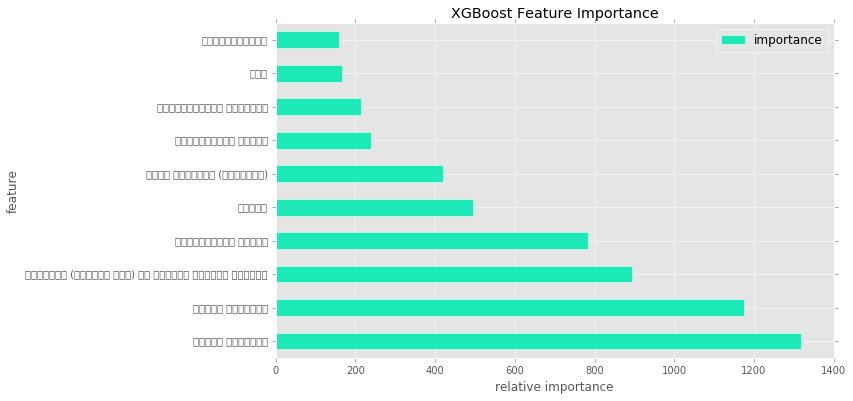

In [169]:
%matplotlib inline
from matplotlib import rc
font = {'family': 'Droid Sans',
        'weight': 'normal',
        'size':12}
rc('font', **font)


def lgbm(X, Y, verbose=True, predict=False, x_test=None, kf=True, feat_imp=True):    
    from sklearn.metrics import f1_score, roc_auc_score
    from sklearn.model_selection import KFold
    from pylightgbm.models import GBMClassifier
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    
    feature_list = X.columns
    feature_dict = dict(zip(range(len(feature_list)), feature_list))
    X = X.values

    exec = "~/apps/LightGBM/lightgbm"  # full path to lightgbm executable (on Windows include .exe)
    clf = GBMClassifier(num_iterations=200, exec_path=exec, learning_rate=0.2, min_data_in_leaf=140, verbose=0,
                        max_bin=255)

    if kf:
        kf = KFold(n_splits=7
                   , shuffle=True)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            clf.fit(X_train, y_train, test_data=[(X_test, y_test)])
            if verbose:
                y_pred = clf.predict(X_test)
                # print('\nScore for another fold: ', roc_auc_score(y_test, y_pred))

    if feat_imp:
        df_fi = pd.DataFrame(list(clf.feature_importance().items()), columns=['feature', 'importance'])
        df_fi = df_fi.replace({"feature": feature_dict}).sort_values('importance', ascending=False)
        print(df_fi)
        plt.figure()
        df_fi.head(10).plot(kind='barh',
                            x='feature',
                            y='importance',
                            sort_columns=False,
                            legend=True,
                            figsize=(10, 6),
                            facecolor='#1DE9B6',
                            edgecolor='white')

        plt.title('XGBoost Feature Importance')
        plt.xlabel('relative importance')
        plt.show()
    
    if predict:
        clf.fit(X, Y)
        print('\nFinal result for train set is ', roc_auc_score(Y, clf.predict(X)))
       
        return clf.predict(x_test.values)

lgbm(all_data, target)